# Brasileirão Série A: O caminho dos campeões
Por [Daniel Soares](https://www.linkedin.com/in/daniel-soares-ti/)


<div style="display:inline-block;vertical-align:top;">
<h2>Sumário:</h2>
<ul>
    <li><a href="#introducao">Introdução </a></li>
    <li><a href="#maior-campeao">Maiores campeões</a></li>
    <li><a href="#melhor-pior">Melhor e "pior" campeão</a></li>
    <li><a href="#ano-competitivo">Competitividade durante os anos</a></li>
    <li><a href="#ano-consecutivo">Algum time venceu anos consecutivos?</a></li>

</ul>
</div>
<div style="display:inline-block; margin-left:50px; margin-top:15px">
<img src="https://media.giphy.com/media/xUOxf1JRLpx5wy7UyY/giphy.gif" style="height: 230px; width:370px;"/>
    <div style="text-align:center; font-size:12px"><i>Fonte: <a href="https://media.giphy.com/media/xUOxf1JRLpx5wy7UyY/giphy.gif">Giphy</a></i></div>
</div>

--------


In [12]:
import pandas as pd
import plotly.express as px

# Lendo os dados
games_data = pd.read_csv('../data/campeonato-brasileiro-full.csv')

In [53]:
def corrigir_indexes_e_colunas_tabela(dataframe):
    """Corrige indexes e colunas do dataframe

    Args:
        dataframe (pd.Dataframe): Dataframe com os jogos

    Returns:
        pd.Dataframe: Dataframe com os indexes e colunas corrigidos
    """
    dataframe = dataframe.reset_index()
    dataframe = dataframe.set_index(pd.Index(range(1, dataframe.shape[0] + 1)))
    dataframe = dataframe.rename(columns={'vencedor': 'times', 
                                          'count': 'pontos'})
    
    return dataframe

def inserir_ano_do_titulo(dataframe_pontos, ano):
    """Insere o ano da conquista no

    Args:
        dataframe_pontos (pd.DataFrame): tabela com a classificação
        ano (int): ano para inserir
        
    Returns:
        pd.DataFrame: tabela com o ano da conquista inserido
    """
    dataframe_pontos['ano'] = ano
    
    return dataframe_pontos

def calcular_distancia_segundo_colocado(dataframe_pontos):
    """Calcula a diferença de pontos entre o primeiro e o segundo colocado

    Args:
        dataframe_pontos (pd.DataFrame): tabela com a classificação

    Returns:
        pd.DataFrame: tabela com a diferença de pontos calculada
    """
    dataframe_pontos['distancia_segundo_colocado'] = dataframe_pontos.iloc[0][1]\
        - dataframe_pontos.iloc[1][1]
        
    return dataframe_pontos

def calcular_pontos_de_vitoria(dataframe_original, ano):
    """Calcula a pontuação inicial dos times com base em suas vitórias

    Args:
        dataframe_original (pd.Dataframe): Dataframe com os jogos
        ano (int): ano do campeonato

    Returns:
        pd.Dataframe: Dataframe com os pontos iniciais calculados
    """
    tabela_campeonato = dataframe_original.query(f'ano == {ano}').vencedor\
        .value_counts()[1:].to_frame()
    tabela_campeonato = tabela_campeonato * 3
    
    return tabela_campeonato

def adicionar_pontos_empate(dataframe_original, dataframe_pontos, ano):
    """Adiciona pontos para os jogos que terminaram empatados

    Args:
        dataframe (pd.Dataframe): dataframe com os jogos
        dataframe_pontos (pd.Dataframe): dataframe com os pontos iniciais
        ano (int): ano do campeonato

    Returns:
        pd.Dataframe: dataframe com os pontos de empate inseridos
    """
    for time in dataframe_original.query(f"ano == {ano} and vencedor =='-'")\
        .mandante:
        dataframe_pontos.loc[time] = dataframe_pontos.loc[time] + 1
        
    for time in dataframe_original.query(f"ano == {ano} and vencedor =='-'")\
        .visitante:
        dataframe_pontos.loc[time] = dataframe_pontos.loc[time] + 1
    
    return dataframe_pontos

def aplicar_punicoes_2003(tabela_de_classificacao):
    """Aplica as punições de perda de pontos referente ao ano de 2003

    Args:
        tabela_de_classificacao (pd.DataFrame): tabela com a classificação
        
    Returns:
        pd.DataFrame: tabela com as punições aplicadas
    """
    tabela_de_classificacao.loc['Ponte Preta'] = tabela_de_classificacao\
        .loc['Ponte Preta'] - 1
    tabela_de_classificacao.loc['Internacional'] = tabela_de_classificacao\
        .loc['Internacional'] + 2
    tabela_de_classificacao.loc['Juventude'] = tabela_de_classificacao\
        .loc['Juventude'] + 3
    tabela_de_classificacao.loc['Paysandu'] = tabela_de_classificacao\
        .loc['Paysandu'] - 8
    tabela_de_classificacao.loc['Sao Caetano'] = tabela_de_classificacao\
        .loc['Sao Caetano'] + 3
    tabela_de_classificacao.loc['Corinthians'] = tabela_de_classificacao\
        .loc['Corinthians'] + 2
    tabela_de_classificacao.loc['Fluminense'] = tabela_de_classificacao\
        .loc['Fluminense'] + 2
        
    return tabela_de_classificacao

def aplicar_punicoes_2004(tabela_de_classificacao):
    """Aplica as punições de perda de pontos referente ao ano de 2004

    Args:
        tabela_de_classificacao (pd.DataFrame): tabela com a classificação
    
    Returns:
        pd.DataFrame: tabela com as punições aplicadas
    """
    tabela_de_classificacao.loc['Sao Caetano'] = tabela_de_classificacao\
        .loc['Sao Caetano'] - 24
        
    return tabela_de_classificacao
    

def aplicar_punicoes_2010(tabela_de_classificacao):
    """Aplica as punições de perda de pontos referente ao ano de 2010

    Args:
        tabela_de_classificacao (pd.DataFrame): tabela com a classificação

    Returns:
        pd.DataFrame: tabela com as punições aplicadas
    """
    tabela_de_classificacao.loc['Gremio Prudente'] = tabela_de_classificacao\
        .loc['Gremio Prudente'] - 3
    
    return tabela_de_classificacao

def aplicar_punicoes_2013(tabela_de_classificacao):
    """Aplica as punições de perda de pontos referente ao ano de 2013

    Args:
        tabela_de_classificacao (pd.DataFrame): tabela com a classificação

    Returns:
        pd.DataFrame: tabela com as punições aplicadas
    """
    tabela_de_classificacao.loc['Flamengo'] = tabela_de_classificacao\
        .loc['Flamengo'] - 4
    tabela_de_classificacao.loc['Portuguesa'] = tabela_de_classificacao\
        .loc['Portuguesa'] - 4
    
    return tabela_de_classificacao

def aplicar_punicoes_2016(tabela_de_classificacao):
    """Aplica as punições de perda de pontos referente ao ano de 2016

    Args:
        tabela_de_classificacao (pd.DataFrame): tabela com a classificação

    Returns:
        pd.DataFrame: tabela com as punições aplicadas
    """
    tabela_de_classificacao.loc['Santa Cruz'] = tabela_de_classificacao\
        .loc['Santa Cruz'] - 3
    
    return tabela_de_classificacao

def aplicar_punicoes_2018(tabela_de_classificacao):
    """Aplica as punições de perda de pontos referente ao ano de 2018

    Args:
        tabela_de_classificacao (pd.DataFrame): tabela com a classificação

    Returns:
        pd.DataFrame: tabela com as punições aplicadas
    """
    tabela_de_classificacao.loc['Sport'] = tabela_de_classificacao\
        .loc['Sport'] - 3
    
    return tabela_de_classificacao

def buscar_campeoes(classificacao, lista_de_anos):
    """Busca os campeões de cada ano

    Args:
        classificacao (dict): Dicionário contendo as classificações de cada ano
        lista_de_anos (list): lista contendo os anos que serão buscados

    Returns:
        pd.DataFrame: tabela com os campeões de cada ano
    """
    tabela_campeoes = pd.DataFrame()
    for ano in lista_de_anos:
        tabela_campeoes = pd.concat([tabela_campeoes, 
                                     classificacao[ano].iloc[0, :].to_frame().T]
                                    )
    
    return tabela_campeoes

def gerar_tabela_de_sequencias():
    """Gera uma tabela com as sequências de campeão de cada time
    
    Returns:
        pd.DataFrame: tabela com as sequências de campeão de cada time
    """
    tabela = pd.DataFrame([dict(time = 'Cruzeiro', start='2003-01-01', end='2003-12-31'), 
                  dict(time = 'Santos', start = '2004-01-01', end = '2004-12-31'), 
                  dict(time = 'Corinthians', start = '2005-01-01', end = '2005-12-31'),
                  dict(time = 'Sao Paulo', start = '2006-01-01', end = '2006-12-31'),
                  dict(time = 'Sao Paulo', start = '2007-01-01', end = '2007-12-31'),
                  dict(time = 'Sao Paulo', start = '2008-01-01', end = '2008-12-31'),
                  dict(time = 'Flamengo', start = '2009-01-01', end = '2009-12-31'),
                  dict(time = 'Fluminense', start = '2010-01-01', end = '2010-12-31'),
                  dict(time = 'Corinthians', start = '2011-01-01', end = '2011-12-31'),
                  dict(time = 'Fluminense', start = '2012-01-01', end = '2012-12-31'),
                  dict(time = 'Cruzeiro', start = '2013-01-01', end = '2013-12-31'),
                  dict(time = 'Cruzeiro', start = '2014-01-01', end = '2014-12-31'),
                  dict(time = 'Corinthians', start = '2015-01-01', end = '2015-12-31'),
                  dict(time = 'Palmeiras', start = '2016-01-01', end = '2016-12-31'),
                  dict(time = 'Corinthians', start = '2017-01-01', end = '2017-12-31'),
                  dict(time = 'Palmeiras', start = '2018-01-01', end = '2018-12-31'),
                  dict(time = 'Flamengo', start = '2019-01-01', end = '2019-12-31'),
                  dict(time = 'Flamengo', start = '2020-01-01', end = '2020-12-31'),
                  dict(time = 'Atletico-MG', start = '2021-01-01', end = '2021-12-31'),
                  dict(time = 'Palmeiras', start = '2022-01-01', end = '2022-12-31')])
    
    return tabela

def plotar_maiores_campeoes(tabela_times_campeoes):
    """
    Plota um gráfico com os maiores campeões do campeonato brasileiro
    
    Args:
        tabela_times_campeoes (pd.DataFrame): tabela com os times campeões
    
    Returns:
        Gráfico com os maiores campeões
    """
    count_campeoes = tabela_times_campeoes.times.value_counts().to_frame()
    count_campeoes = count_campeoes.reset_index()\
    .rename(columns={'count': 'títulos'})

    fig = px.treemap(count_campeoes, path = ['times', 'títulos'], values='títulos')

    fig.update_layout(
        title=dict(text="Títulos do Campeonato Brasileiro por time", font=dict(size=25))
    )
    
    return fig

def plotar_melhor_pior_campeoes(tabela_times_campeoes):
    """Mostra o gráfico com o desempenho de cada time campeão

    Args:
        tabela_times_campeoes (pd.DataFrame): tabela com os times campeões
    
    Returns:
        Gráfico com o desempenho de cada time campeão
    """
    fig = px.scatter(tabela_times_campeoes, 
                 x = 'pontos', 
                 y = 'times', 
                 color = 'formato',
                 color_discrete_sequence=['crimson', 'MidnightBlue'])

    fig.update_traces(marker=dict(size=12, 
                                line=dict(width=2, 
                                            color='DarkSlateGrey')),
                    selector=dict(mode='markers'),
                    opacity = 0.70)

    fig.update_layout(title=dict(text="Pontuação final de cada Campeão Brasileiro", 
                                font=dict(size=25)))

    fig.add_annotation(x=100, 
                    y='Cruzeiro', 
                    text="Cruzeiro de 2002",
                    showarrow=True,
                    arrowhead=6,
                    bordercolor="darkgray",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="lightgray",
                    arrowsize= 2.75,
                    arrowcolor='crimson') 

    fig.add_annotation(x=90, 
                    y='Flamengo', 
                    text="Flamengo de 2019",
                    showarrow=True,
                    arrowhead=6,
                    bordercolor="darkgray",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="lightgray",
                    arrowsize= 2.75,
                    arrowcolor='MidnightBlue')

    fig.add_annotation(x=67, 
                    y='Flamengo', 
                    text="Flamengo de 2009",
                    showarrow=True,
                    arrowhead=6,
                    bordercolor="darkgray",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="lightgray",
                    arrowsize= 2.75,
                    arrowcolor='MidnightBlue')
    
    return fig

def plotar_diferenca_segundo_colocado(tabela_times_campeoes):
    """Plota um gráfico com as diferenças entre o primeiro e o segundo colocado

    Args:
        tabela_times_campeoes (pd.DataFrame): tabela com os times campeões
    """
    fig = px.line(tabela_times_campeoes, x='ano', 
                y = 'distancia_segundo_colocado',
                text='distancia_segundo_colocado')

    fig.update_traces(textposition="bottom left")

    fig.update_layout(title=dict(text="Diferença de pontos entre o primeiro e segundo colocado", 
                                font=dict(size=25)))

    fig.add_hrect(y0=0.80,
                y1=3.25,
                line_width=0,
                fillcolor="red",
                opacity=0.2,
                annotation_text="1 rodada de diferença",
                annotation_position="bottom left")

    fig.add_hrect(y0=15.50,
                y1=16.50,
                line_width=0,
                fillcolor="green",
                opacity=0.2,
                annotation_text="6 rodadas de diferença",
                annotation_position="top left")
    
    return fig

def plotar_timeline_campeoes_consecutivos(tabela_sequencias):
    """
    Plota uma timeline com os campeões
    Args:
        tabela_sequencias (pd.DataFrame): tabela com os anos e os campeões
        
    Returns:
        Gráfico com a timeline dos campeões
    """
    fig = px.timeline(tabela_sequencias, x_start="start", x_end="end", y="time", color="time")

    fig.update_yaxes(title = None)

    fig.update_layout(title=dict(text="Linha do tempo com os campeões", 
                                font=dict(size=25)),
                    showlegend=False)

    fig.add_vrect(x0='2006-01-01',
                x1='2008-12-31',
                line_width=0,
                fillcolor="green",
                opacity=0.2)

    fig.add_vrect(x0='2013-01-01',
                x1='2014-12-31',
                line_width=0,
                fillcolor="green",
                opacity=0.2)

    fig.add_vrect(x0='2019-01-01',
                x1='2020-12-31',
                line_width=0,
                fillcolor="green",
                opacity=0.2)
    
    return fig
    

<a id='introducao'></a>
# Introdução
"O Brasileirão é o campeonato mais difícil do mundo". Essa é uma frase que você 
provavelmente já escutou na rua, e que vem provando ser verdadeira. A Federação 
Internacional de História e Estatísticas do Futebol (IFFHS), organização 
reconhecida pela FIFA, [publicou](https://www.iffhs.com/posts/2483) no início de 
2023 um ranking de campeonatos nacionais, e levando em conta fatores como força 
dos concorrentes e conquistas dos times na temporada, coroou o Brasileirão como 
o mais difícil do mundo pelo segundo ano consecutivo.

Diante disso, chegamos a uma pergunta: Qual o caminho dos campeões? O que um time
precisa para conquistar o atual campeonato mais difícil do planeta?

<div class="alert alert-warning" role="alert">
    <b>Aviso!</b> Esta análise não irá considerar os títulos anteriores ao ano 
    de 2003.
</div>

In [3]:
# Para evitar problemas quando for plotar os gráficos, vou alterar o dtype
# das colunas que necessitam
games_data['data'] = pd.to_datetime(games_data['data'], dayfirst=True)
games_data['hora'] = pd.to_datetime(games_data['hora'], format='%H:%M').dt.time

# Para separar os campeonatos por ano, irei criar uma coluna com o ano 
# de cada jogo. Aqui, irei alterar manualmente os anos de 2020 e 2021, que 
# possuem rodadas de campeonatos diferentes devido a pandemia
games_data['ano'] = games_data['data'].dt.year

indexes_rodadas_2020 = games_data\
    .query("data > '2020-08-01' and data < '2021-03-01'").index
    
games_data.iloc[indexes_rodadas_2020, -1] = 2020


In [4]:
# Para gerar as classificações de forma correta, terei que separar os anos
# que tiveram punições e os que não tiveram para então usar as funções

anos_sem_punicao = [2005, 2006, 2007, 2008, 2009, 2011, 2012, 2014, 2015, 2017, 
                    2019, 2020, 2021, 2022]

anos_com_punicao = [2003, 2004, 2010, 2013, 2016, 2018]

classificacao = {}

# Para os anos sem punição, irei usar as funções criadas para calcular os pontos

for ano in anos_sem_punicao:
    classificacao[ano] = calcular_pontos_de_vitoria(games_data, ano)
    
    classificacao[ano] = adicionar_pontos_empate(games_data, classificacao[ano], 
                                                 ano)
    
    classificacao[ano] = classificacao[ano].sort_values(by='count',
                                                          ascending=False)
    
    classificacao[ano] = corrigir_indexes_e_colunas_tabela(classificacao[ano])
    
    classificacao[ano] = inserir_ano_do_titulo(classificacao[ano], ano)
    
    classificacao[ano] = calcular_distancia_segundo_colocado(classificacao[ano])
    
# Para os anos com punição, irei calcular as pontuações e após isso aplicar as
# punições

for ano in anos_com_punicao:
    classificacao[ano] = calcular_pontos_de_vitoria(games_data, ano)
    
    classificacao[ano] = adicionar_pontos_empate(games_data, classificacao[ano],
                                                 ano)

classificacao[2003] = aplicar_punicoes_2003(classificacao[2003])

classificacao[2004] = aplicar_punicoes_2004(classificacao[2004])

classificacao[2010] = aplicar_punicoes_2010(classificacao[2010])

classificacao[2013] = aplicar_punicoes_2013(classificacao[2013])

classificacao[2016] = aplicar_punicoes_2016(classificacao[2016])

classificacao[2018] = aplicar_punicoes_2018(classificacao[2018])

for ano in anos_com_punicao:
    classificacao[ano] = classificacao[ano].sort_values(by='count',
                                                        ascending=False)
    
    classificacao[ano] = corrigir_indexes_e_colunas_tabela(classificacao[ano])
    
    classificacao[ano] = inserir_ano_do_titulo(classificacao[ano], ano)
    
    classificacao[ano] = calcular_distancia_segundo_colocado(classificacao[ano])
    
# Com as tabelas prontas, basta unir todos os anos em uma lista para então
# buscar os campeões de cada ano
    
anos = anos_sem_punicao + anos_com_punicao
    
tabela_times_campeoes = buscar_campeoes(classificacao, sorted(anos))

# E por último, irei criar uma função para rotular os anos com formatos de 
# competição diferentes, onde houve um número maior de times participantes do
# que o formato atual, de 20 times

func_inserir_formato = lambda ano: 'Formato antigo' if ano in [2003, 2004, 2005]\
    else 'Formato atual'

tabela_times_campeoes['formato'] = tabela_times_campeoes['ano']\
    .apply(func_inserir_formato)

tabela_sequencias = gerar_tabela_de_sequencias()
    

<a id='maior-campeao'></a>
# Maiores campeões
O Campeão é a equipe mais regular, aquela que além de fazer o dever de casa, 
vencendo os jogos em seus domínios, também consegue beliscar uns pontos quando 
joga fora dele. Diante disso, e considerando que 20 times disputam o campeonato
desde 2006, qual é aquele que podemos chamar de bicho papão? 



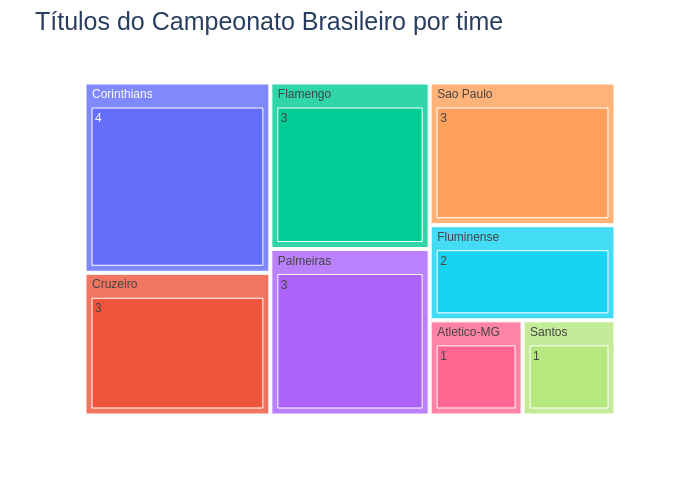

In [13]:
fig = plotar_maiores_campeoes(tabela_times_campeoes)
fig.show("png")

Aqui nós temos o Corinthians como o maior campeão da era dos pontos corridos, 
levando 4 taças para seus domínios. O time paulista é seguido de perto por 4
times que levantaram a taça 3 vezes: Cruzeiro, Palmeiras, São Paulo e Flamengo.
Também é possível notar que os times de São Paulo dominam a competição, onde os
quatro grandes levaram, pelo menos uma vez, a taça para casa.

<a id='melhor-pior'></a>
# Melhor e "pior" campeão


Mesmo dentre os melhores, existe aquele que se destaca, assim como o que também,
mesmo sendo o melhor, deixa a desejar. Tendo todos os campeõs como base, é hora 
de descobrir qual é o melhor e o "pior" campeão.

<div class="alert alert-warning" role="alert">
    <b>Lembrete!</b> A quantidade de pontos 
possíveis de ganhar eram diferentes nos primeiros campeonatos, totalizando 138 
contra os 114 atuais. Isso será levado em consideração na análise.
</div>

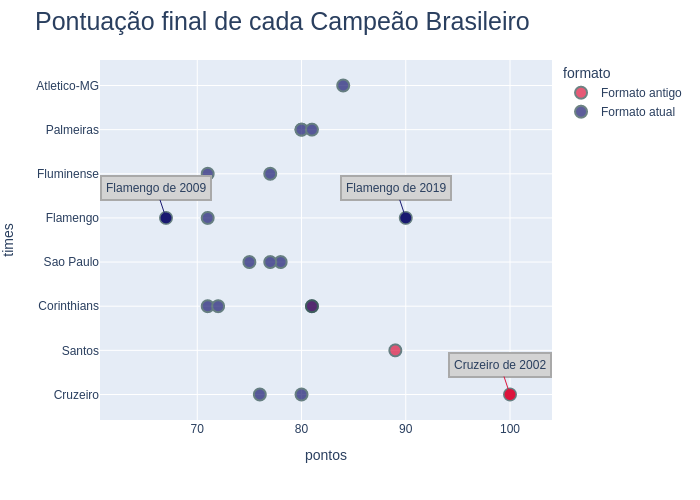

In [17]:
fig = plotar_melhor_pior_campeoes(tabela_times_campeoes)
fig.show("png")

O Cruzeiro de 2002 mostrou para o que veio, e com 100 pontos conquistados, foi
o time que mais pontuou em um campeonato. Se levarmos em conta a diferença entre 
a pontuação possível e a conquistada, o Cruzeiro perde o seu posto para o 
Flamengo de 2019, que conquistou 90 pontos, 24 de diferença para os 114 
possíveis contra os 38 de diferença para os 138 possíveis da equipe mineira.

A equipe carioca também foi o campeão mais "fraco" da era dos pontos corridos,
conquistando 67 pontos na campanha de 2009. 

<a id='ano-competitivo'></a>
# Competitividade durante os anos

Ser competitivo é uma das coisas que dão emoção ao campeonato, decidir o título
na última partida, com a mídia apontando todos os holofotes para o seu time é
quase um teste pra cardíaco. Como Galvão Bueno, um dos principais narradores do
Brasil, diria: "Haja coração!". Vejamos abaixo como se deu a diferença de pontos
entre o campeão e o vice durante os anos.

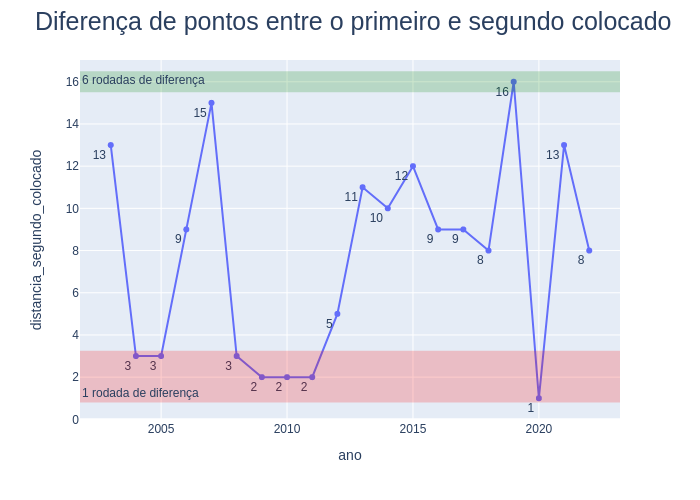

In [48]:
fig = plotar_diferenca_segundo_colocado(tabela_times_campeoes)
fig.show("png")

Temos 7 times que foram campeões do Brasileirão com até 3 pontos de diferença, 
o que equivale a 1 rodada, onde uma derrota ou um simples empate poderia ter 
lhes custado o título. Além disso, temos outros 13 times que não dependeram de 
1 vitória para conquistar o título, tendo o Flamengo de 2019 levantado a taça 
com incríveis 16 pontos de diferença para o segundo colocado, o equivalente a 
6 rodadas (5 vitórias e 1 empate).

<a id='ano-consecutivo'></a>
# Campeões consecutivos

Ser campeão de forma consecutiva nunca é fácil, pois além de ter que manter o
nível de jogo, o time também tem que lidar com a pressão de ser o atual campeão.
Há também o aumento de força dos rivais, que durante as janelas de transferência,
buscam se reforçar para tentar tirar o título do atual campeão. Diante disso, 
vamos ver quais times foram capazes de manter o nível e vencer o torneio em anos
consecutivos.

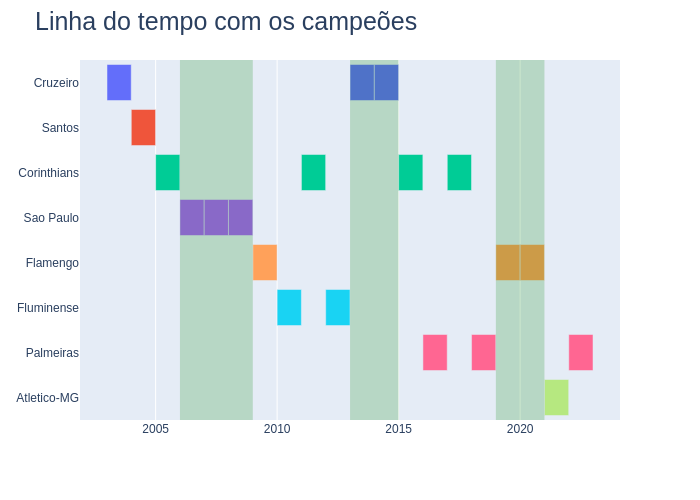

In [55]:
fig = plotar_timeline_campeoes_consecutivos(tabela_sequencias)
fig.show("png")

O grande destaque vai para o São Paulo, que venceu o campeonato 3 vezes seguidas,
entre 2006 e 2008, sendo o único clube à alcançar esse feito durante a era dos 
pontos corridos. Cruzeiro e Flamengo ameaçaram o feito, mas acabaram ficando
apenas com 2 títulos consecutivos. 

# Conclusão

A liga brasileira é sem dúvidas uma das mais fortes do mundo, que apresenta desafios adicionais como logística e gramado ruim em relação a campeonatos mais prestigiados como a Premier League e a La Liga. Aqui, mesmo os maiores campeões já foram coadjuvantes um dia, chegando a serem rebaixados para a segunda divisão e tendo que lutar para voltar à elite do futebol brasileiro e ao caminho dos títulos. Vimos também que até 1 simples vitória pode declarar o campeão, e que ganhar o campeonato de forma consecutiva é um feito para poucos.

<div class="alert alert-success" role="alert">
  E chegamos ao final! Foi um prazer construir esse notebook, pois é um tema que gosto bastante e me possibilitou aprender bastante! Obrigado por ler!
</div>


<div style="display:inline-block; width:100%; text-align: center;">
    <br>
  <img src="https://media.giphy.com/media/ANAQfgWpyDWEmIUHia/giphy.gif" align=middle/>
    <i><br>Fonte: <a href="https://media.giphy.com/media/ANAQfgWpyDWEmIUHia/giphy.gif">Giphy</a></i>
</div>